## ИУ5-63Б Балюк А.В. РК-1 
### Вариант 1

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

In [115]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data.shape

(150, 4)

In [116]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
print(data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [118]:
data.loc[0, 'sepal length (cm)'] = np.nan

# Удаление строк с пропусками
data.dropna(inplace=True)

In [119]:
#Добавим численный категориальный признак, который будет принимать значение 1, если длина лепестка больше 5см, и 0 если нет
data['is_long_iris'] = (data['sepal length (cm)'] > 5).astype(int)
data.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_long_iris
sepal length (cm),1.000000,-0.112106,0.871281,0.816961,0.671808
sepal width (cm),-0.112106,1.000000,-0.423302,-0.360480,-0.043662
petal length (cm),0.871281,-0.423302,1.000000,0.962423,0.617184
petal width (cm),0.816961,-0.360480,0.962423,1.000000,0.597245
is_long_iris,0.671808,-0.043662,0.617184,0.597245,1.000000


**Целевой признак**: is_long_iris (длинный ли ирис), принимает значения в диапазоне [0, 1]

Из матрицы корреляции видим, что целевой признак имеет среднюю корреляцю со следующими признаками (0.6 и более):
* sepal length (cm) (длина лепестка)
* petal length (cm) (длина чашелистика)

Меньше всего на целевой признак влияет "sepal width" (длина лепестка), поэтому при\
создании модели можно им пренебречь в первую очередь

Воспользуемся тепловой картой для проверки нецелевых признаков

<Axes: >

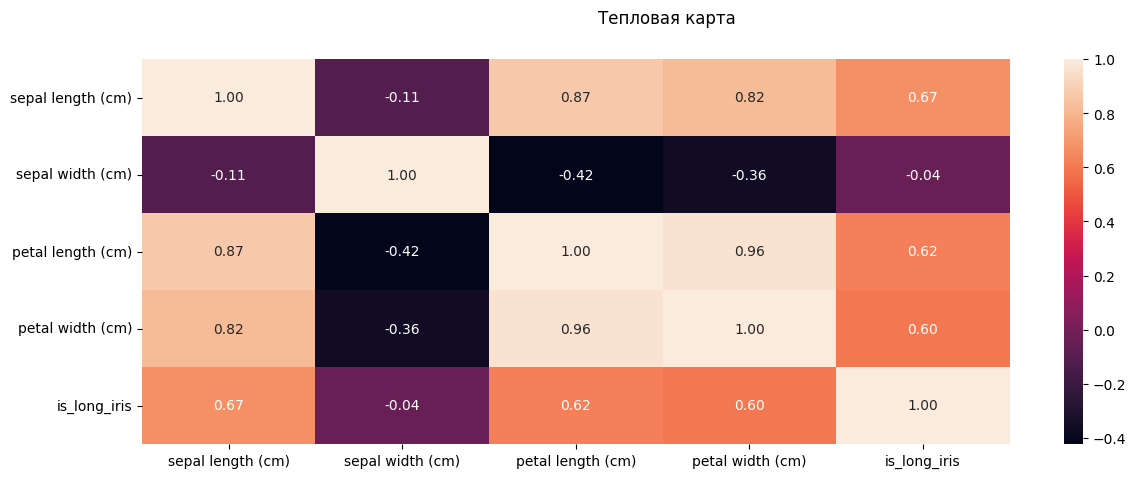

In [120]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(14,5))
fig.suptitle('Тепловая карта')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.2f')

Видим, что выбранные в предыдущем пункте признаки (sepal length, petal length) сильно коррелируют между собой c коэффициентом 0.87

### Дополнительное задание для группы ИУ5-63Б
Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

<Axes: ylabel='petal width (cm)'>

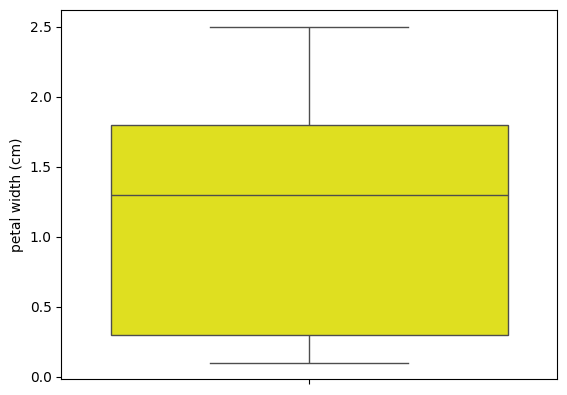

In [121]:
# Я выбрал колонку CGPA (усредненный балл оценок в аттестате)
sns.boxplot(y=data["petal width (cm)"], color='yellow')